Hola Alejandra!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd  #libreria para estructuras
import matplotlib.pyplot as plt #librería para gráficas
import seaborn as sns #construir diagrama de caja en python
import numpy as np #se usa para funciones matemáticas complejas




## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
#df_car_orders=pd.read_csv('/datasets/instacart_orders.csv', sep=';') 
calls = pd.read_csv('/datasets/megaline_calls.csv') #datos sobre las llamadas
internet = pd.read_csv('/datasets/megaline_internet.csv') #datos sobre internet
messages = pd.read_csv('/datasets/megaline_messages.csv') #datos sobre los SMS
plans = pd.read_csv('/datasets/megaline_plans.csv') #datos sobre las tarifas
users = pd.read_csv('/datasets/megaline_users.csv') #datos de los usuarios




<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo realizando la importación de librerías y carga de datos en celdas separadas, esto ayuda a que la lectura y seguimiento del notebook sea más amigable
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cómo recomendación cuando declares una variable deja un espacio a cada lado del `=` para que el código sea más fácil de leer
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el ajuste
</div>

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info()
plans.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [4]:
# Imprime una muestra de los datos para las tarifas

plans.sample()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cuando quieras mostrar el resultado que devuelve `.head()`, o `.sample()` no es necesario el uso de `print` ya que pierdes la capacidad del notebook de mostrar el DataFrame en formato de tabla. Te recomiendo ejecutar la línea sin print o utilizar `display()` en su lugar.
</div>

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] 
RESPUESTA= LA BASE DE DATOS ESTÁ CORRECTA, NO TIENE VALORES AUSENTES , ES LA INFORMACIÓN DE LOS PLANES , TARIFAS Y EXTRAS QUE COBRAN EN CASO DE EXCEDERSE EN ALGUNA TARIFA. SOLO SON DOS REGISTROS TARIFAS DE SURF Y ULTIMATE.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [5]:
# Convertir `mb_per_month_included` a gigabytes
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

print(plans[['plan_name', 'mb_per_month_included', 'gb_per_month_included']])


  plan_name  mb_per_month_included  gb_per_month_included
0      surf                  15360                   15.0
1  ultimate                  30720                   30.0


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te recomiendo hacer la transformación de mb a gb de la columna mb_per_month_included ya que el resto esta en función de GB y no de mb
</div>

RESPUESTA: Ya quedó convertido en GB , no lo realicé porque más abajo cuando se requirió si hice la conversión para el cálculo. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el ajuste
</div>

## Usuarios/as

In [6]:



users.info()
unique_values = users['churn_date'].unique()
print(unique_values)

# Imprime una muestra de datos para usuarios
users.sample(5)
users.dtypes




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
[nan '2018-12-18' '2018-11-16' '2018-09-07' '2018-12-30' '2018-10-07'
 '2018-12-31' '2018-11-24' '2018-11-11' '2018-12-12' '2018-11-14'
 '2018-12-27' '2018-11-29' '2018-12-22' '2018-11-30' '2018-10-13'
 '2018-07-31' '2018-12-15' '2018-12-19' '2018-10-03' '2018-10-22'
 '2018-08-16' '2018-12-26' '2018-09-01' '2018-11-21' '2018-08-19'
 '2018-12-10' '2018-09-17' '2018-11-18' '2018-09-18']


user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una vez cargues los datos al inicio no es necesario que lo vuelvas a hacer, de hecho esto puede ser contraproducente si aplicaste algún proceso antes ya que si vuelves a cargarlos eliminas todo ese proceso.
</div>

De acuerdo , yo creo lo realicé por algo en especial. Quiza para probar algo en específico .


RESPUESTA: Los datos en los campos reg_date y churn date hay que convertirlo como tipo fecha y el el churn_date hay datos nulos NAN

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [7]:
# Mostrar los tipos de datos antes de la conversión
print("Antes de la conversión:")
print(users.dtypes)

users['churn_date'] = pd.to_datetime(users['churn_date'],format='%Y/%m/%d')
#users['churn_date'] = users['churn_date'].fillna('2024-12-01') #a los NaT les puse una fecha fija futura
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y/%m/%d')

# Mostrar los tipos de datos después de la conversión
print("\nDespués de la conversión:")
print(users.dtypes)
print('***********')
unique_values = users['churn_date'].unique()
print(unique_values)
print('***********')
unique_values = users['reg_date'].unique()
#print(unique_values)



Antes de la conversión:
user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

Después de la conversión:
user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object
***********
[                          'NaT' '2018-12-18T00:00:00.000000000'
 '2018-11-16T00:00:00.000000000' '2018-09-07T00:00:00.000000000'
 '2018-12-30T00:00:00.000000000' '2018-10-07T00:00:00.000000000'
 '2018-12-31T00:00:00.000000000' '2018-11-24T00:00:00.000000000'
 '2018-11-11T00:00:00.000000000' '2018-12-12T00:00:00.000000000'
 '2018-11-14T00:00:00.000000000' '2018-12-27T00:00:00.000000000'
 '2018-11-29T00:00:00.000000000' '2018-12-22T00:00:00.000000000'
 '2018-11-30T00:00:00.000000000' '2018-10-13T00:00:00.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

En este caso no es recomendable llenar los datos de `churn_date` ya que estos valores ausentes tienen un significado el cual es que si no tiene fecha es por que el usuario aún sigue manteniendo un plan, al llenar los datos estarías perdiendo esa parte
</div>

La fecha que consideré fué adelantada, pero entonces lo conveniente sería dejarla como valos Nan ?
Hice la corrección y mis cambios de fecha los puse en comentarios.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Cuando se tiene valores ausentes que representan algo es mejor dejarlos cómo NaN, por por ejemplo si quisieras revisar cuantos usuarios siguen activos lo único que tendrías que hacer es buscar los usuarios con NaN en esa columna, buen trabajo con el cambio
</div>

### Enriquecer los datos

## Llamadas

In [8]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()
print(calls.dtypes)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
id            object
user_id        int64
call_date     object
duration     float64
dtype: object


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una vez cargues los datos al inicio no es necesario que lo vuelvas a hacer, de hecho esto puede ser contraproducente si aplicaste algún proceso antes ya que si vuelves a cargarlos eliminas todo ese proceso.
</div>

In [9]:
# Imprime una muestra de datos para las llamadas

print(calls.sample(5))


              id  user_id   call_date  duration
74901   1264_192     1264  2018-12-05      4.64
99279    1356_20     1356  2018-12-08      7.33
8607     1041_42     1041  2018-07-05      5.02
136941  1496_110     1496  2018-11-18      7.92
100756  1359_646     1359  2018-02-22      4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [10]:
print("Antes de la conversión:")
print(calls.dtypes)

calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y/%m/%d')
#calls['duration'] = pd.to_timedelta(calls['duration'], unit='m') #opcional convertir duration a timedelta

#users['churn_date'] = users['churn_date'].fillna('2024-12-01') #a los NaT les puse una fecha fija futura
#users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y/%m/%d')

# Mostrar los tipos de datos después de la conversión
print("\nDespués de la conversión:")
print(calls.dtypes)
print('***********')
print(calls.sample(5))
#unique_values = calls['call_date'].unique()
#print(unique_values)
print('***********')

#unique_values = users['reg_date'].unique()
#print(unique_values)

Antes de la conversión:
id            object
user_id        int64
call_date     object
duration     float64
dtype: object

Después de la conversión:
id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object
***********
              id  user_id  call_date  duration
59718   1215_103     1215 2018-09-21      0.65
38453   1144_356     1144 2018-06-21      5.57
28552   1109_179     1109 2018-12-12      0.00
25610   1098_299     1098 2018-09-08     16.13
113037  1397_780     1397 2018-12-23      1.95
***********


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [11]:
# Añadir columna 'year_month' al DataFrame 'calls'
calls['year_month'] = calls['call_date'].dt.to_period('M')

#redondear la duración de las llamadas
calls['total_minutes'] = np.ceil(calls['duration'])

print(calls.dtypes)
print(calls.head(10))

id                       object
user_id                   int64
call_date        datetime64[ns]
duration                float64
year_month            period[M]
total_minutes           float64
dtype: object
         id  user_id  call_date  duration year_month  total_minutes
0   1000_93     1000 2018-12-27      8.52    2018-12            9.0
1  1000_145     1000 2018-12-27     13.66    2018-12           14.0
2  1000_247     1000 2018-12-27     14.48    2018-12           15.0
3  1000_309     1000 2018-12-28      5.76    2018-12            6.0
4  1000_380     1000 2018-12-30      4.22    2018-12            5.0
5  1000_388     1000 2018-12-31      2.20    2018-12            3.0
6  1000_510     1000 2018-12-27      5.75    2018-12            6.0
7  1000_521     1000 2018-12-28     14.18    2018-12           15.0
8  1000_530     1000 2018-12-28      5.77    2018-12            6.0
9  1000_544     1000 2018-12-26      4.40    2018-12            5.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo extrayendo los datos y redondeando hacia arriba la columna duration! 
</div>

## Mensajes

In [12]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()
print('***********')
print (messages.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
***********
id              object
user_id          int64
message_date    object
dtype: object


In [13]:
# Imprime una muestra de datos para los mensajes
print(messages.sample(5))



             id  user_id message_date
90     1001_160     1001   2018-10-17
57787   1364_79     1364   2018-11-24
38797  1254_436     1254   2018-08-29
28181  1173_361     1173   2018-10-15
10017   1076_57     1076   2018-10-28


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
RESPUESTA: No hay valores nulos pero la fecha de los mensajes hay que convertirla a tipo date.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [14]:
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y/%m/%d')
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [15]:
messages['year_month'] = messages['message_date'].dt.to_period('M')

print(messages.head(5))

         id  user_id message_date year_month
0  1000_125     1000   2018-12-27    2018-12
1  1000_160     1000   2018-12-31    2018-12
2  1000_223     1000   2018-12-31    2018-12
3  1000_251     1000   2018-12-27    2018-12
4  1000_255     1000   2018-12-26    2018-12


## Internet

In [16]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [17]:
# Imprime una muestra de datos para el tráfico de internet

print(internet.head(10))

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
    RESPUESTA : No hay datos nulos y el session_date hay que convertilo a tipo date.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y/%m/%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [19]:
# Añadir columna 'year_month' al DataFrame 'internet'
internet['year_month'] = internet['session_date'].dt.to_period('M')
internet['gb_used'] = internet['mb_used']/1024
print(internet.head(5))



         id  user_id session_date  mb_used year_month   gb_used
0   1000_13     1000   2018-12-29    89.86    2018-12  0.087754
1  1000_204     1000   2018-12-31     0.00    2018-12  0.000000
2  1000_379     1000   2018-12-28   660.40    2018-12  0.644922
3  1000_413     1000   2018-12-26   270.99    2018-12  0.264639
4  1000_442     1000   2018-12-27   880.22    2018-12  0.859590


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo! Aquí también podrías aplicar un redondeo hacia arriba al resultado de la conversión de MB a GB
</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [20]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.info()
print('**************')
plans.head ()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes
**************


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Recuerda que algunos métodos necesitan terminar con `()` para poder dar el resultado correcto, en lugar de plans.head lo correcto sería `plans.head()` y sin el print
</div>

De acuerdo. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el ajuste
</div>

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [21]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_count = calls.groupby(['user_id', 'year_month']).size().reset_index(name='calls_count')

print( calls_count.head (5))


#mg_users_calls = pd.merge(users, calls, on='user_id', how='inner')
#print(mg_users_calls.head())


   user_id year_month  calls_count
0     1000    2018-12           16
1     1001    2018-08           27
2     1001    2018-09           49
3     1001    2018-10           65
4     1001    2018-11           64


In [22]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

minutes_used = calls.groupby(['user_id', 'year_month'])['total_minutes'].sum().reset_index()
print( minutes_used.head (5))



   user_id year_month  total_minutes
0     1000    2018-12          124.0
1     1001    2018-08          182.0
2     1001    2018-09          315.0
3     1001    2018-10          393.0
4     1001    2018-11          426.0


In [23]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

messages_count = messages.groupby(['user_id', 'year_month']).size().reset_index(name='message_count')
print( messages_count.head (5))

   user_id year_month  message_count
0     1000    2018-12             11
1     1001    2018-08             30
2     1001    2018-09             44
3     1001    2018-10             53
4     1001    2018-11             36


In [24]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet_traffic = internet.groupby(['user_id', 'year_month'])['mb_used'].sum().reset_index(name='total_mb_used')

print(internet_traffic.head(5))


   user_id year_month  total_mb_used
0     1000    2018-12        1901.47
1     1001    2018-08        6919.15
2     1001    2018-09       13314.82
3     1001    2018-10       22330.49
4     1001    2018-11       18504.30


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [25]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Fusionar los DataFrames resultantes en uno solo
merged_consumo = pd.merge(minutes_used, calls_count, on=['user_id', 'year_month'], how='outer')
merged_consumo = pd.merge(merged_consumo, messages_count, on=['user_id', 'year_month'], how='outer')
merged_consumo = pd.merge(merged_consumo, internet_traffic, on=['user_id', 'year_month'], how='outer')


print(merged_consumo.head(10))


   user_id year_month  total_minutes  calls_count  message_count  \
0     1000    2018-12          124.0         16.0           11.0   
1     1001    2018-08          182.0         27.0           30.0   
2     1001    2018-09          315.0         49.0           44.0   
3     1001    2018-10          393.0         65.0           53.0   
4     1001    2018-11          426.0         64.0           36.0   
5     1001    2018-12          412.0         56.0           44.0   
6     1002    2018-10           59.0         11.0           15.0   
7     1002    2018-11          386.0         55.0           32.0   
8     1002    2018-12          384.0         47.0           41.0   
9     1003    2018-12         1104.0        149.0           50.0   

   total_mb_used  
0        1901.47  
1        6919.15  
2       13314.82  
3       22330.49  
4       18504.30  
5       19369.18  
6        6552.01  
7       19345.08  
8       14396.24  
9       27044.14  


In [26]:
# Añade la información de la tarifa

# Fusionar 'users' con 'plans' en base a la columna 'plan'
users_with_plans = pd.merge(users, plans, left_on='plan', right_on='plan_name', how='left')


merged_consumo_with_plans = pd.merge(merged_consumo, users_with_plans[['user_id', 'plan', 'usd_monthly_pay', 'minutes_included', 'messages_included', 'mb_per_month_included', 'usd_per_minute', 'usd_per_message', 'usd_per_gb']], on='user_id', how='left')

#print(users_with_plans.head(5))
#print(users_with_plans.dtypes)
print("************************************")
print ( "Base de datos fusionada user_consumo_plantarifa")
print(merged_consumo_with_plans.head(5))
print(merged_consumo_with_plans.dtypes)

************************************
Base de datos fusionada user_consumo_plantarifa
   user_id year_month  total_minutes  calls_count  message_count  \
0     1000    2018-12          124.0         16.0           11.0   
1     1001    2018-08          182.0         27.0           30.0   
2     1001    2018-09          315.0         49.0           44.0   
3     1001    2018-10          393.0         65.0           53.0   
4     1001    2018-11          426.0         64.0           36.0   

   total_mb_used      plan  usd_monthly_pay  minutes_included  \
0        1901.47  ultimate               70              3000   
1        6919.15      surf               20               500   
2       13314.82      surf               20               500   
3       22330.49      surf               20               500   
4       18504.30      surf               20               500   

   messages_included  mb_per_month_included  usd_per_minute  usd_per_message  \
0               1000               

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [27]:
# Calcula el ingreso mensual para cada usuario


# Rellenar valores NaN con 0 en las columnas relevantes
merged_consumo_with_plans['total_minutes'].fillna(0, inplace=True)
merged_consumo_with_plans['message_count'].fillna(0, inplace=True)
merged_consumo_with_plans['total_mb_used'].fillna(0, inplace=True)


# Calcular los excesos
merged_consumo_with_plans['extra_minutes'] = merged_consumo_with_plans['total_minutes'] - merged_consumo_with_plans['minutes_included']
merged_consumo_with_plans['extra_messages'] = merged_consumo_with_plans['message_count'] - merged_consumo_with_plans['messages_included']
merged_consumo_with_plans['extra_data'] = merged_consumo_with_plans['total_mb_used'] - merged_consumo_with_plans['mb_per_month_included']

print(merged_consumo_with_plans.head(5))

# Asegurar que no haya valores negativos (los valores negativos significan que el usuario no ha excedido el límite)
merged_consumo_with_plans['extra_minutes'] = merged_consumo_with_plans['extra_minutes'].where(merged_consumo_with_plans['extra_minutes'] >= 0, 0)
merged_consumo_with_plans['extra_messages'] = merged_consumo_with_plans['extra_messages'].where(merged_consumo_with_plans['extra_messages'] >= 0, 0)
merged_consumo_with_plans['extra_data'] = merged_consumo_with_plans['extra_data'].where(merged_consumo_with_plans['extra_data'] >= 0, 0)

print(merged_consumo_with_plans.head(5))

#Calcular los costos adicionales
merged_consumo_with_plans['extra_minutes_cost'] = merged_consumo_with_plans['extra_minutes'] * merged_consumo_with_plans['usd_per_minute']
merged_consumo_with_plans['extra_messages_cost'] = merged_consumo_with_plans['extra_messages'] * merged_consumo_with_plans['usd_per_message']
# Convertimos MB extras a GB y calculamos el costo
merged_consumo_with_plans['extra_data_cost'] = (merged_consumo_with_plans['extra_data'] / 1024) * merged_consumo_with_plans['usd_per_gb']
                                    
# Calcular los ingresos totales
merged_consumo_with_plans['monthly_revenue'] = (merged_consumo_with_plans['usd_monthly_pay'] + merged_consumo_with_plans['extra_minutes_cost'] + merged_consumo_with_plans['extra_messages_cost'] + merged_consumo_with_plans['extra_data_cost'] )
                                                                           

                                                                                        
print("Ingresos mensuales por usuario:")
print(merged_consumo_with_plans[['user_id', 'year_month', 'monthly_revenue']])

   user_id year_month  total_minutes  calls_count  message_count  \
0     1000    2018-12          124.0         16.0           11.0   
1     1001    2018-08          182.0         27.0           30.0   
2     1001    2018-09          315.0         49.0           44.0   
3     1001    2018-10          393.0         65.0           53.0   
4     1001    2018-11          426.0         64.0           36.0   

   total_mb_used      plan  usd_monthly_pay  minutes_included  \
0        1901.47  ultimate               70              3000   
1        6919.15      surf               20               500   
2       13314.82      surf               20               500   
3       22330.49      surf               20               500   
4       18504.30      surf               20               500   

   messages_included  mb_per_month_included  usd_per_minute  usd_per_message  \
0               1000                  30720            0.01             0.01   
1                 50                  15

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la agregación de los datos! Recuerda que para mostrar los resultados en un Notebook lo mejor es omitir el uso de print
</div>

Si quiero ver la tabla en lugar del print que me sugieres aquí, para visualizarla.

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

Duración promedio de llamadas por plan y por mes:
        plan year_month  avg_call_duration
22  ultimate    2018-11         445.196850
13  ultimate    2018-02         403.142857
7       surf    2018-08         410.111111
6       surf    2018-07         449.983471
0       surf    2018-01         203.000000


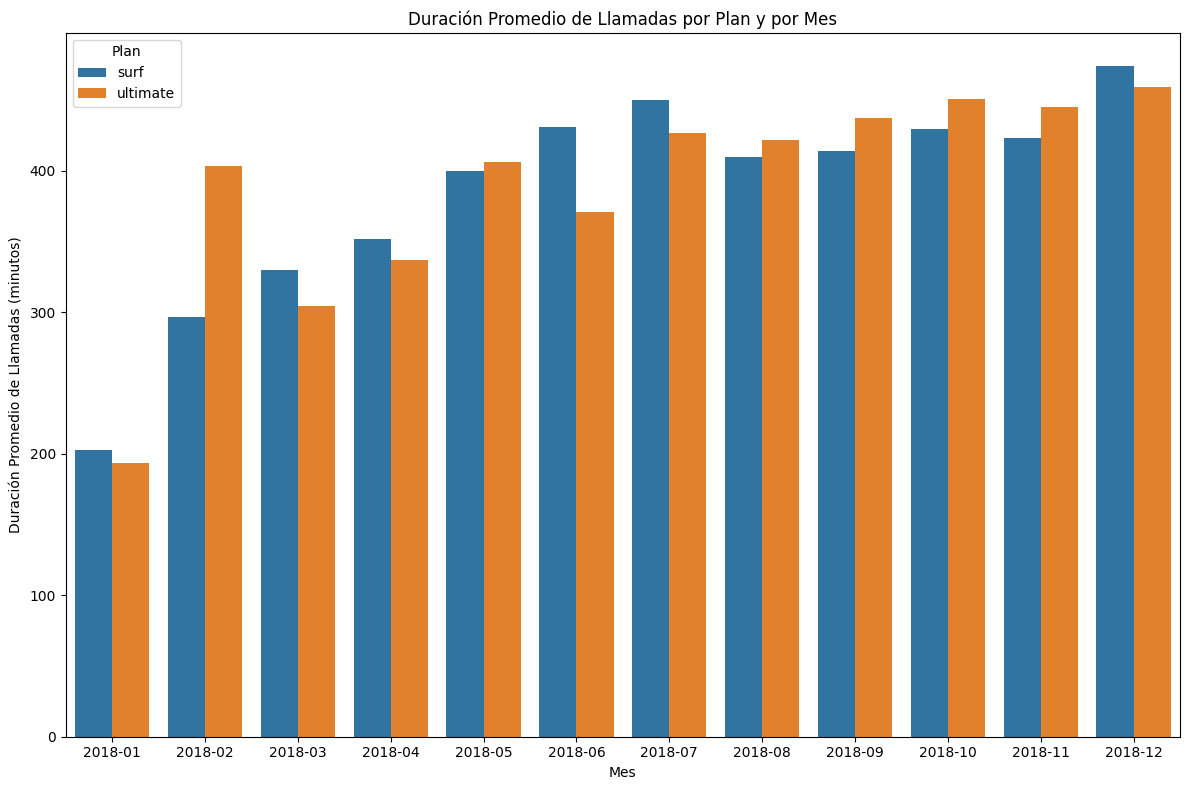

In [28]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Calcular la duración promedio de llamadas por plan y por mes
avg_call_duration = merged_consumo_with_plans.groupby(['plan', 'year_month'])['total_minutes'].mean().reset_index()
avg_call_duration.rename(columns={'total_minutes': 'avg_call_duration'}, inplace=True)
print("Duración promedio de llamadas por plan y por mes:")
print(avg_call_duration.sample(5))

# Configurar el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_call_duration, x='year_month', y='avg_call_duration', hue='plan')

# Título y etiquetas del gráfico
plt.title('Duración Promedio de Llamadas por Plan y por Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas (minutos)')

# Mostrar el gráfico
plt.legend(title='Plan')
plt.tight_layout()
plt.show()


Respuesta: El promedio de la duración de llamadas está alrededor de los 400 minutos por mes. Excepto en Enero .

No handles with labels found to put in legend.


     user_id  plan  total_minutes
54      1055  surf         1917.0
203     1206  surf         1940.0
318     1325  surf          588.0
280     1285  surf         1960.0
89      1090  surf         2749.0


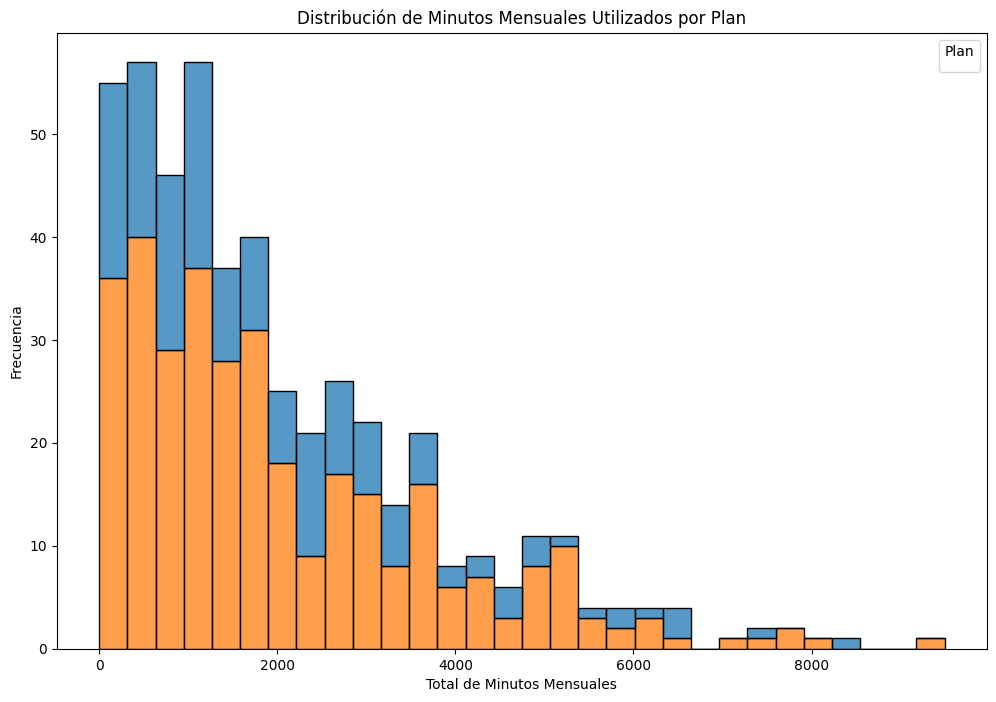

In [29]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Agrupar los datos por plan y usuario para obtener el número total de minutos mensuales utilizados
monthly_minutes_by_plan = merged_consumo_with_plans.groupby(['user_id', 'plan'])['total_minutes'].sum().reset_index()

print(monthly_minutes_by_plan.sample(5))

# Configurar el gráfico
plt.figure(figsize=(12, 8))

# Trazar el histograma
sns.histplot(data=monthly_minutes_by_plan, x='total_minutes', hue='plan', multiple='stack', kde=False, bins=30)

# Título y etiquetas del gráfico
plt.title('Distribución de Minutos Mensuales Utilizados por Plan')
plt.xlabel('Total de Minutos Mensuales')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.legend(title='Plan')
#plt.tight_layout()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [30]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Agrupar los datos por usuario y mes para obtener la duración total de llamadas mensuales
monthly_call_duration = merged_consumo_with_plans.groupby(['user_id', 'year_month'])['total_minutes'].sum().reset_index()

#print(monthly_call_duration.head(5))

# Calcular la media de la duración mensual de llamadas
mean_duration = monthly_call_duration['total_minutes'].mean()

# Calcular la varianza de la duración mensual de llamadas
variance_duration = monthly_call_duration['total_minutes'].var()

# Mostrar los resultados
print(f"Media de la duración mensual de llamadas: {mean_duration:.2f} minutos")
print(f"Varianza de la duración mensual de llamadas: {variance_duration:.2f} minutos^2")


Media de la duración mensual de llamadas: 429.28 minutos
Varianza de la duración mensual de llamadas: 55847.18 minutos^2


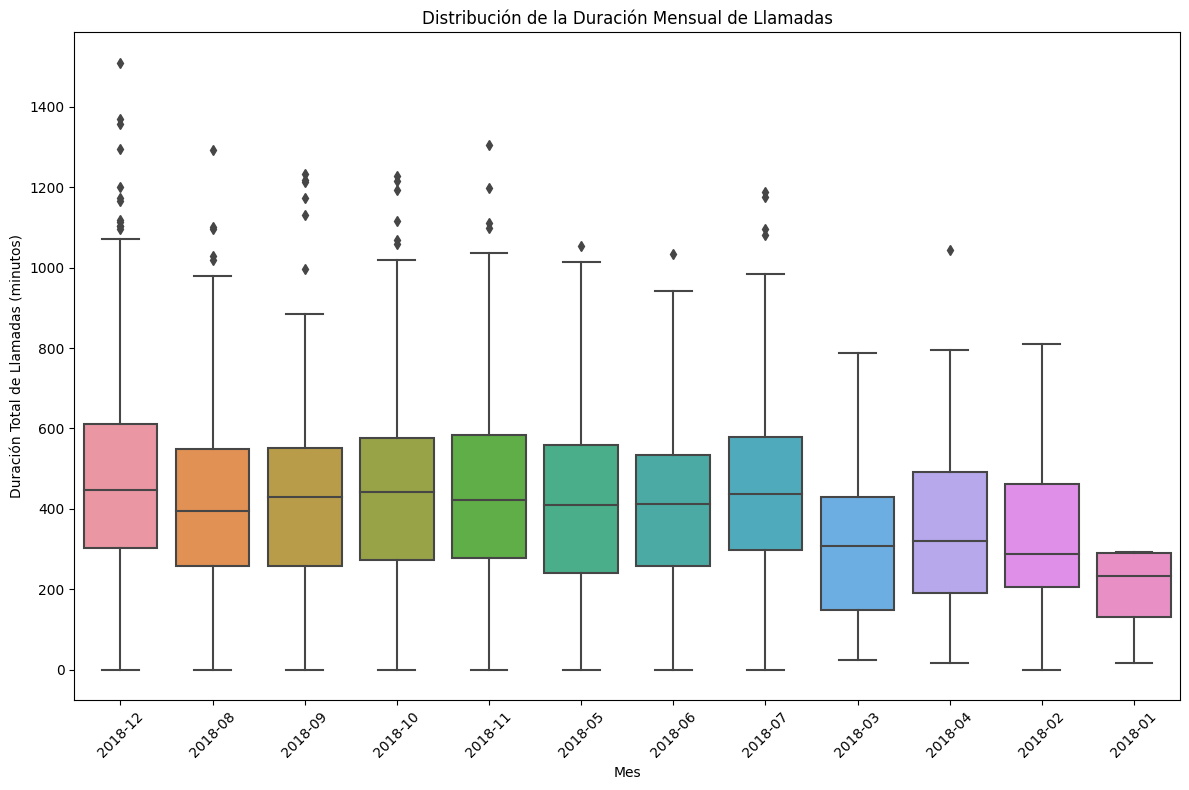

In [31]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
# Agrupar los datos por usuario y mes para obtener la duración total de llamadas mensuales
monthly_call_duration = merged_consumo_with_plans.groupby(['user_id', 'year_month'])['total_minutes'].sum().reset_index()

# Configurar el gráfico
plt.figure(figsize=(12, 8))

# Trazar el diagrama de caja
sns.boxplot(data=monthly_call_duration, x='year_month', y='total_minutes')

# Título y etiquetas del gráfico
plt.title('Distribución de la Duración Mensual de Llamadas')
plt.xlabel('Mes')
plt.ylabel('Duración Total de Llamadas (minutos)')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()




RESPUESTA: Casi todo el año la media se mantiene al rededor de 400 minutos en promedio la duración de las llamadas , excepto del primer cuarto del año que tiende a disminuir el consumo.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Lo hiciste muy bien con las visualizaciones, te recomiendo agregar tus interpretaciones de las gráficas cómo conclusiones debajo de cada una
</div>

### Mensajes

Número promedio de mensajes enviados por plan y por mes:
   plan year_month  avg_message_count
0  surf    2018-01          10.500000
1  surf    2018-02          12.000000
2  surf    2018-03          15.260870
3  surf    2018-04          17.400000
4  surf    2018-05          24.012987


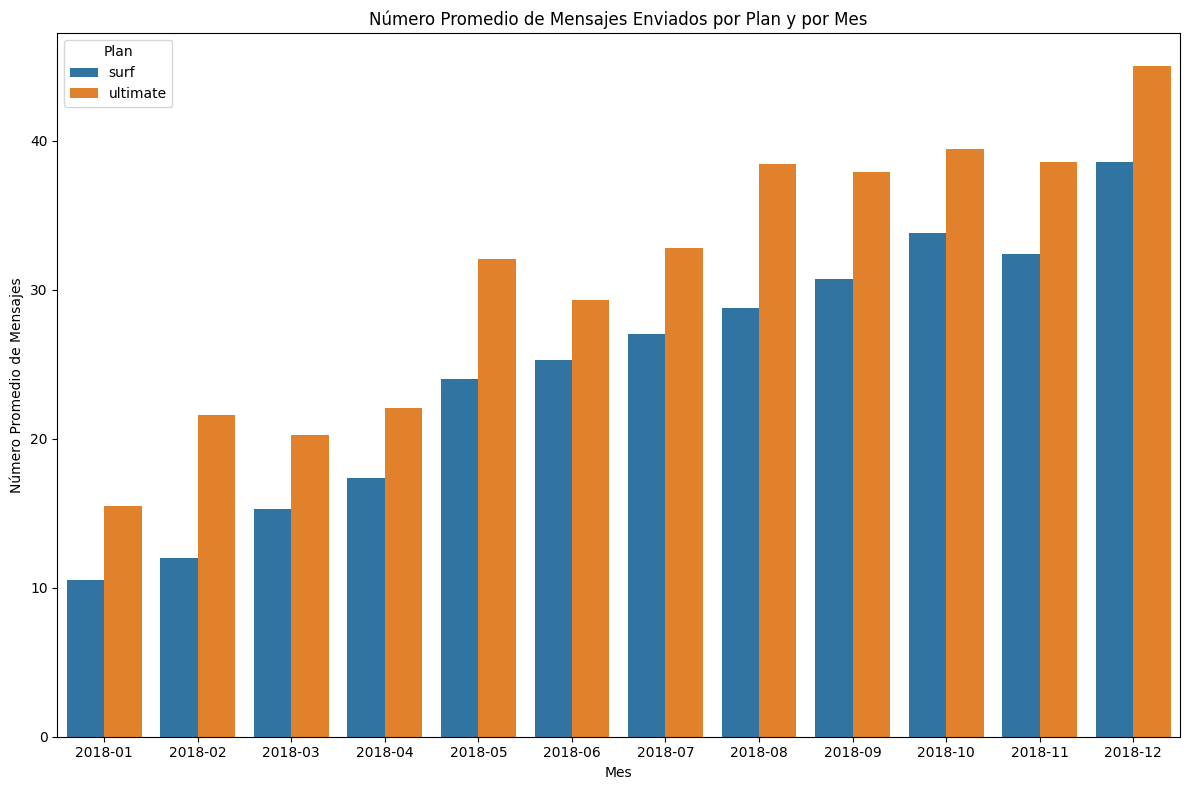

In [32]:
# Calcular el número promedio de mensajes enviados por plan y por mes
avg_messages_per_plan_month = merged_consumo_with_plans.groupby(['plan', 'year_month'])['message_count'].mean().reset_index()
avg_messages_per_plan_month.rename(columns={'message_count': 'avg_message_count'}, inplace=True)

print("Número promedio de mensajes enviados por plan y por mes:")
print(avg_messages_per_plan_month.head(5))

# Configurar el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_messages_per_plan_month, x='year_month', y='avg_message_count', hue='plan')

# Título y etiquetas del gráfico
plt.title('Número Promedio de Mensajes Enviados por Plan y por Mes')
plt.xlabel('Mes')
plt.ylabel('Número Promedio de Mensajes')

# Mostrar el gráfico
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

In [33]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# Calcular el promedio de tráfico de Internet consumido por plan
avg_internet_usage_per_plan = merged_consumo_with_plans.groupby('plan')['total_mb_used'].mean().reset_index()
avg_internet_usage_per_plan.rename(columns={'total_mb_used': 'avg_internet_usage_mb'}, inplace=True)

print("Promedio de tráfico de Internet consumido por plan:")
print(avg_internet_usage_per_plan)


Promedio de tráfico de Internet consumido por plan:
       plan  avg_internet_usage_mb
0      surf           16558.283490
1  ultimate           17214.699694


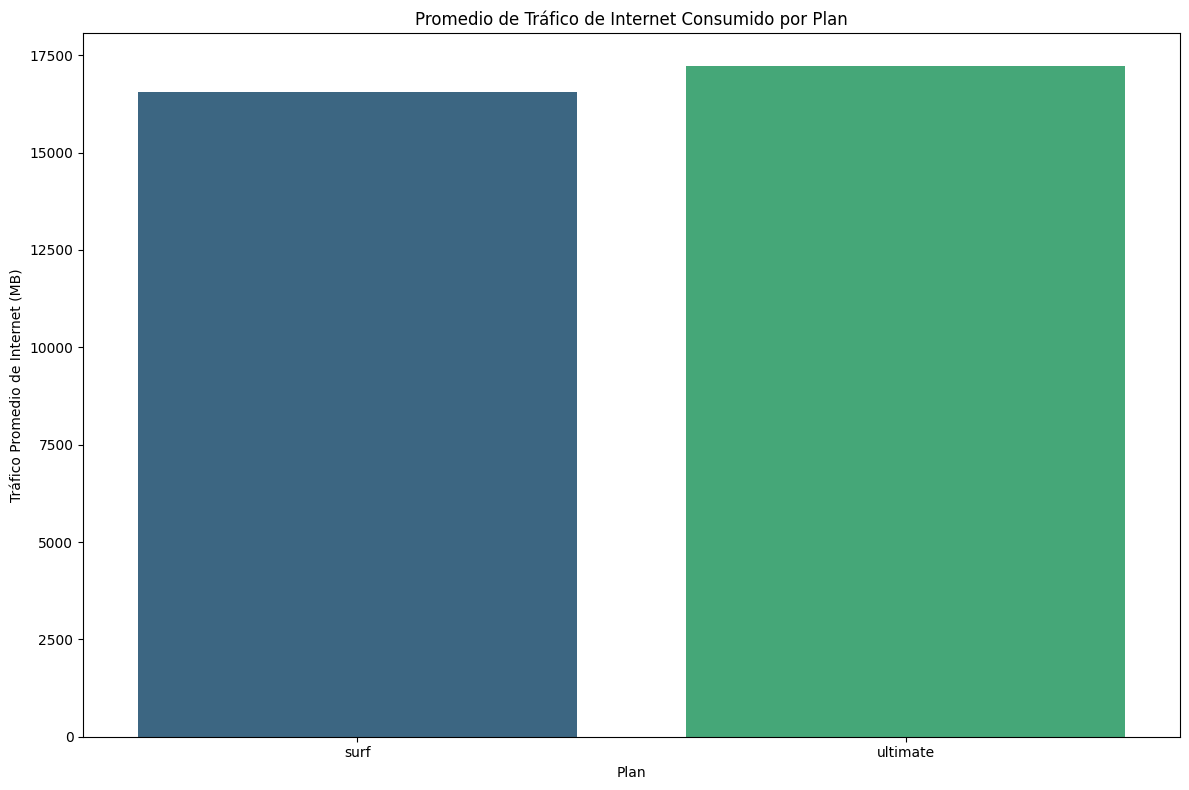

In [34]:
# Configurar el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_internet_usage_per_plan, x='plan', y='avg_internet_usage_mb', palette='viridis')

# Título y etiquetas del gráfico
plt.title('Promedio de Tráfico de Internet Consumido por Plan')
plt.xlabel('Plan')
plt.ylabel('Tráfico Promedio de Internet (MB)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]
RESPUESTA : La diferencia del consumo de los mensajes no es muy diferente entre los dos planes y por lo general los usuarios del plan más económico procuranutilizar menos de los 50 MSM , lo que me llama la atención es que el plan más caro Ultimate , incluye 1,000 mensajes y el consumo promedio 50 MSM se queda muy abajo de lo que incluye el paquete.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Lo hiciste muy bien con las visualizaciones! 
</div>

### Internet

In [35]:
df= merged_consumo_with_plans

# Calcular el promedio de tráfico de Internet consumido por plan y por mes
avg_internet_usage_per_plan_month = df.groupby(['plan', 'year_month'])['total_mb_used'].mean().reset_index()
avg_internet_usage_per_plan_month.rename(columns={'total_mb_used': 'avg_internet_usage_mb'}, inplace=True)

print("Promedio de tráfico de Internet consumido por plan y por mes:")
print(avg_internet_usage_per_plan_month.sample(5))

Promedio de tráfico de Internet consumido por plan y por mes:
        plan year_month  avg_internet_usage_mb
8       surf    2018-09           16591.431289
10      surf    2018-11           16339.254417
20  ultimate    2018-09           16969.869535
7       surf    2018-08           16795.331358
14  ultimate    2018-03           18321.518333


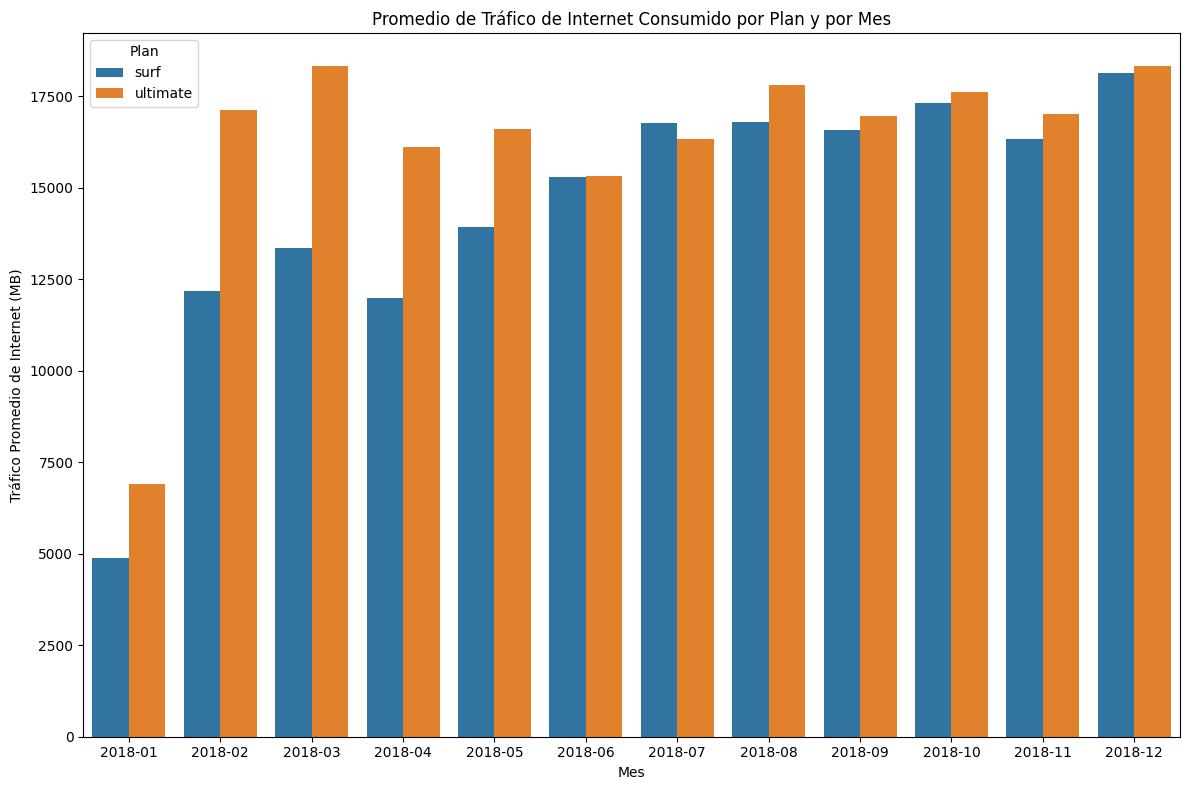

In [36]:
# Configurar el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_internet_usage_per_plan_month, x='year_month', y='avg_internet_usage_mb', hue='plan')

# Título y etiquetas del gráfico
plt.title('Promedio de Tráfico de Internet Consumido por Plan y por Mes')
plt.xlabel('Mes')
plt.ylabel('Tráfico Promedio de Internet (MB)')

# Mostrar el gráfico
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [37]:
# Calcular el promedio de ingresos por plan y por mes
income_per_plan_month = df.groupby(['plan', 'year_month'])['monthly_revenue'].mean().reset_index()
income_per_plan_month.rename(columns={'monthly_revenue': 'avg_income'}, inplace=True)

print("Promedio de ingresos por plan y por mes:")
print(income_per_plan_month.sample(5))

Promedio de ingresos por plan y por mes:
        plan year_month  avg_income
0       surf    2018-01   20.000000
17  ultimate    2018-06   71.476980
23  ultimate    2018-12   73.045714
5       surf    2018-06   46.266207
11      surf    2018-12   66.815009


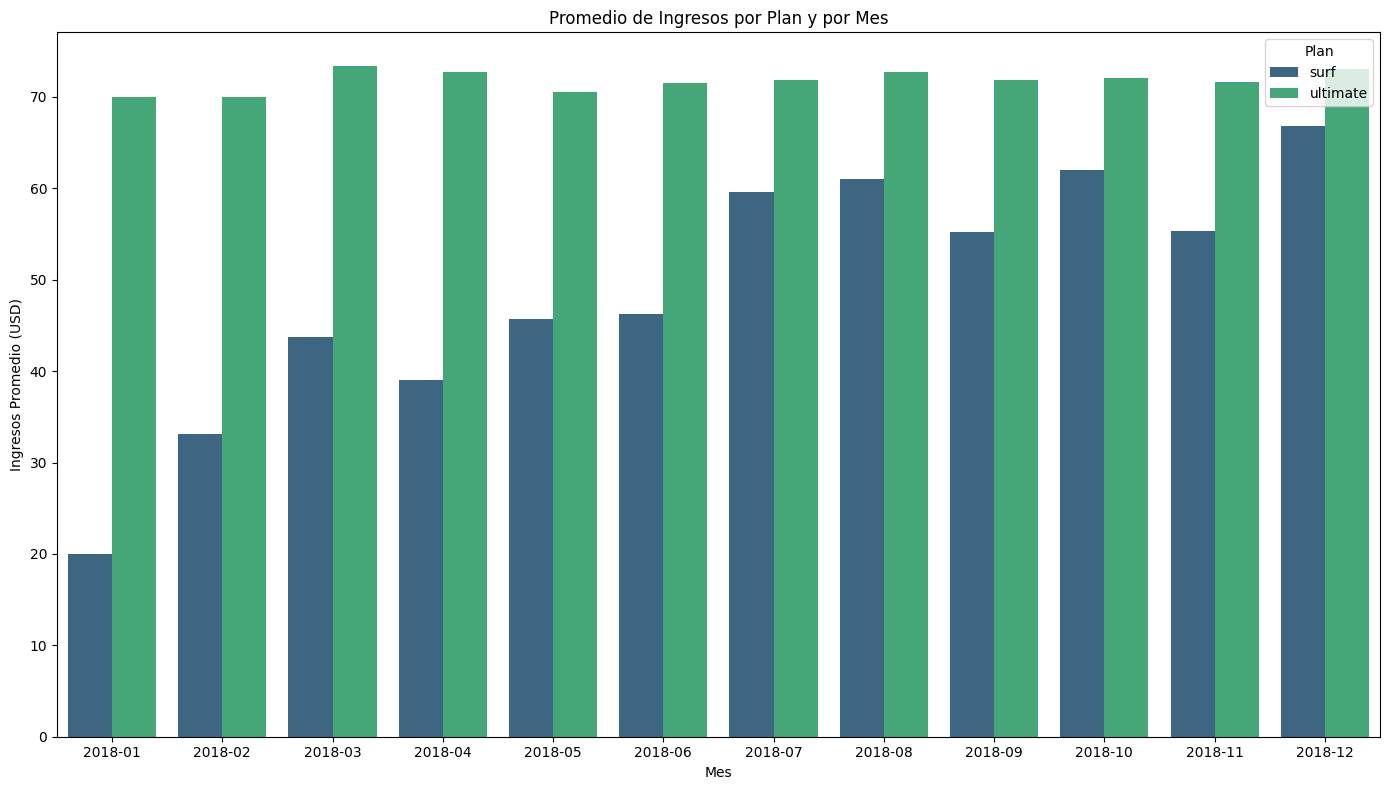

In [38]:
# Configurar el gráfico
plt.figure(figsize=(14, 8))
sns.barplot(data=income_per_plan_month, x='year_month', y='avg_income', hue='plan', palette='viridis')

# Título y etiquetas del gráfico
plt.title('Promedio de Ingresos por Plan y por Mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos Promedio (USD)')

# Mostrar el gráfico
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

Los usuarios de SURF tienen más variabilidad en su consumo con respecto a su PLAN, pero les conviene mantenerse en el plan de $20 usd mensuales que cambiar al de $70, ya que la mayoría el consumo es menor de eso. Y los usuarios de Ultimate están cautivos pagando $70 usd aunque lo que les oferta el plan no lo están consumiendo al 100%

In [39]:
print(merged_consumo_with_plans.dtypes)
print(merged_consumo_with_plans.head(5))

user_id                      int64
year_month               period[M]
total_minutes              float64
calls_count                float64
message_count              float64
total_mb_used              float64
plan                        object
usd_monthly_pay              int64
minutes_included             int64
messages_included            int64
mb_per_month_included        int64
usd_per_minute             float64
usd_per_message            float64
usd_per_gb                   int64
extra_minutes              float64
extra_messages             float64
extra_data                 float64
extra_minutes_cost         float64
extra_messages_cost        float64
extra_data_cost            float64
monthly_revenue            float64
dtype: object
   user_id year_month  total_minutes  calls_count  message_count  \
0     1000    2018-12          124.0         16.0           11.0   
1     1001    2018-08          182.0         27.0           30.0   
2     1001    2018-09          315.0         49

In [40]:
df['total_extra_income'] = df['extra_minutes_cost'] + df['extra_messages_cost'] + df['extra_data_cost']

print("Ingresos extra totales:")
print(df[['total_extra_income', 'monthly_revenue']].head())

Ingresos extra totales:
   total_extra_income  monthly_revenue
0            0.000000        70.000000
1            0.000000        20.000000
2            0.000000        20.000000
3           68.161191        88.161191
4           30.706055        50.706055


In [41]:
# Estadísticas descriptivas de los ingresos extra y totales
extra_income_stats = df['total_extra_income'].describe()
total_income_stats = df['monthly_revenue'].describe()

print("Estadísticas descriptivas de los ingresos extra:")
print(extra_income_stats)

print("Estadísticas descriptivas de los ingresos totales:")
print(total_income_stats)

Estadísticas descriptivas de los ingresos extra:
count    2293.000000
mean       26.508052
std        47.942468
min         0.000000
25%         0.000000
50%         0.420000
75%        37.390020
max       563.061309
Name: total_extra_income, dtype: float64
Estadísticas descriptivas de los ingresos totales:
count    2293.000000
mean       62.208009
std        45.508069
min        20.000000
25%        22.984648
50%        70.000000
75%        70.000000
max       583.061309
Name: monthly_revenue, dtype: float64


Ingresos extra totales y base:
       plan year_month  total_extra_income  base_revenue  monthly_revenue
0  ultimate    2018-12            0.000000          70.0        70.000000
1      surf    2018-08            0.000000          20.0        20.000000
2      surf    2018-09            0.000000          20.0        20.000000
3      surf    2018-10           68.161191          20.0        88.161191
4      surf    2018-11           30.706055          20.0        50.706055
Promedio de ingresos por plan y por mes:
        plan year_month  base_revenue  total_extra_income
20  ultimate    2018-09          70.0            1.812310
14  ultimate    2018-03          70.0            3.392448
7       surf    2018-08          20.0           41.008738
0       surf    2018-01          20.0            0.000000
19  ultimate    2018-08          70.0            2.680102


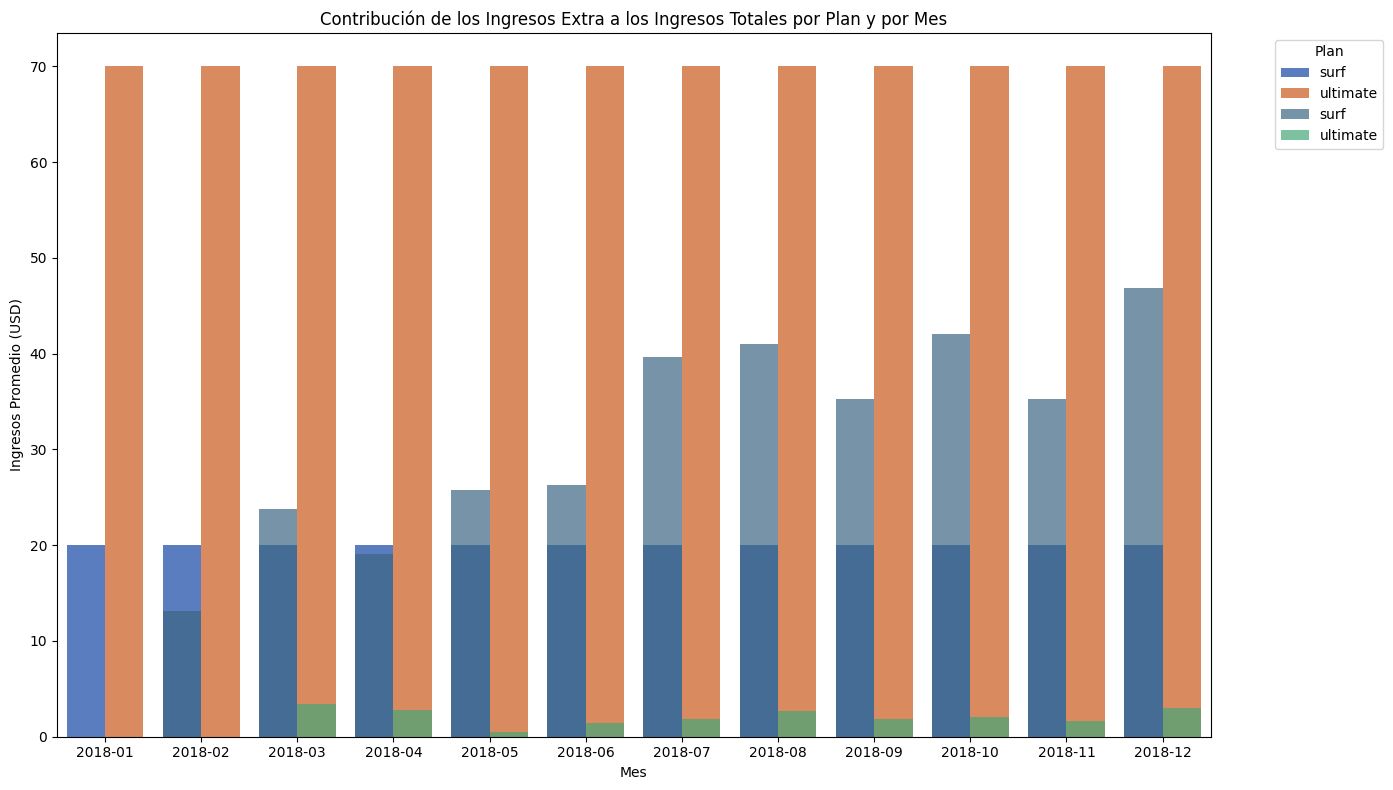

In [42]:

#Visualización de la contribución de los ingresos extra

# Calcular los ingresos extra totales
df['total_extra_income'] = df['extra_minutes_cost'] + df['extra_messages_cost'] + df['extra_data_cost']

# Crear columna de ingresos base
df['base_revenue'] = df['monthly_revenue'] - df['total_extra_income']

print("Ingresos extra totales y base:")
print(df[['plan', 'year_month', 'total_extra_income', 'base_revenue', 'monthly_revenue']].head())


# Agrupar por plan y mes, y calcular promedios
avg_income_per_plan_month = df.groupby(['plan', 'year_month'])[['base_revenue', 'total_extra_income']].mean().reset_index()

print("Promedio de ingresos por plan y por mes:")
print(avg_income_per_plan_month.sample(5))

# Configurar el gráfico
plt.figure(figsize=(14, 8))

# Crear gráfico de barras apiladas
sns.barplot(data=avg_income_per_plan_month, x='year_month', y='base_revenue', hue='plan', ci=None, palette='muted')
sns.barplot(data=avg_income_per_plan_month, x='year_month', y='total_extra_income', hue='plan', ci=None, palette='viridis', alpha=0.7)

# Título y etiquetas del gráfico
plt.title('Contribución de los Ingresos Extra a los Ingresos Totales por Plan y por Mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos Promedio (USD)')
plt.legend(title='Plan', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Esta gráfica fue extra , quería saber que usuarios de que plan gastaban más en extras .
Al parecer la tarifa que dá más ingresos extras es la SURF, de $20 USD que es su plan,  en promedio han terminado pagando 30, 40 hasta 50 usd, debido a los extras que deben de pagar.


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Las gráficas mostradas son muy claras y añadiste tus conclusiones a partir de ellas
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

RESPUESTA:
Hipótesis nula H0: Los ingresos promedio de los usuarios de los planes de llamada Ultimate y Surf son iguales.
Hipótesis alternativa H1: Los ingresos promedio de los usuarios de los planes de llamada Ultimate y Surf son diferentes.




In [43]:
# Prueba las hipótesis

from scipy import stats


# Filtrar los datos para los dos planes
ultimate = df[df['plan'] == 'ultimate']['monthly_revenue']
surf = df[df['plan'] == 'surf']['monthly_revenue']

results=stats.ttest_ind(ultimate, surf)

#Interpretar el resultado


print('valor p:',results.pvalue)

# Determinar si rechazamos la hipótesis nula
alpha = 0.05



if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: hay diferencias significativas en los ingresos promedio.")
else:
    print("No podemos rechazar la hipótesis nula: no hay diferencias significativas en los ingresos promedio.")


#print(df.dtypes)
#print(df.head(10))



valor p: 1.341961045057078e-12
Rechazamos la hipótesis nula: hay diferencias significativas en los ingresos promedio.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [44]:
# Prueba las hipótesis

df_consumo = merged_consumo_with_plans
df_users = users

# Seleccionar las columnas necesarias de df_users
df_users_selected = df_users[['user_id', 'city']]

# Realizar el merge utilizando el campo user_id como clave
df_merged = pd.merge(df_consumo, df_users_selected, on='user_id', how='left')

# Filtrar los datos para el área NY-NJ y otras regiones
ny_nj = df_merged[df_merged['city'].str.contains('NY|NJ', na=False)]['monthly_revenue']
otras_regiones = df_merged[~df_merged['city'].str.contains('NY|NJ', na=False)]['monthly_revenue']

# Verificar la presencia de NaN y eliminarlos
ny_nj_clean = ny_nj.dropna()
otras_regiones_clean = otras_regiones.dropna()

# Realizar la prueba t para muestras independientes
results = stats.ttest_ind(ny_nj_clean, otras_regiones_clean)

# Interpretar el resultado
print('Valor p:', results.pvalue)

# Determinar si rechazamos la hipótesis nula
alpha = 0.05

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: hay diferencias significativas en los ingresos promedio.")
else:
    print("No podemos rechazar la hipótesis nula: no hay diferencias significativas en los ingresos promedio.")

#print(ny_nj.unique())

Valor p: 0.08357992440588836
No podemos rechazar la hipótesis nula: no hay diferencias significativas en los ingresos promedio.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente! Lo hiciste muy bien aplicando el test de hipótesis y agregando los mensajes a mostrarse según si se rechaza o no deja un notebook más claro para cuando alguien más lo revise. Pero cómo esto depende de los procesos anteriores te recomiendo revisarlos y volver a ejecutar esta sección
</div>

In [45]:
#print(ny_nj['city'].unique())

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

La tarifa que más conviene comercializar es la de Surf ya que genera mas ingresos extras porque se exceden del plan, su contribución al negocio es más alta.



<div class="alert alert-block alert-warning">
<b>Comentario general</b> <a class=“tocSkip”></a>
    

Vas por un buen camino Alejandra! Hay ciertos puntos donde hay oportunidad de mejora, te he dejado mis comentarios con algunas recomendaciones para tu próxima iteracion.
<br>
<br>
Han sido pocos los puntos que he identificado pero son necesarios para que tu análisis esté completo. Pero has hecho un buen trabajo hasta este punto, te recomiendo ir describiendo un poco más lo que vas interpretando al final de cada sección para que el leer el proceso de tu análisis sea más fácil de llevar.
<br>
Se que tendrás mejores resultados en tu siguiente iteración.
<br>
Un saludo! 🦾
</div>

<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo realizando los cambios Alejandra! Con esto tu proyecto queda mejor presentado y con gráficas que complementar mejor tu análisis. Saludos!
</div>